#Segmentation of colorful fishes in the ocean

This applied course is inspired by specifications received by our research team a few years ago. It was a request from the Oceanographic Museum of Monaco who wanted to be able to perform augmented reality on their aquariums in order to display in real time the name of the fish species when it was visible to visitors. It will not be a question here of responding to these specifications because the recognition of fish species is a subject still in the research stage, but we are going to realize a software solution allowing to segment an image of the seabed containing a fish and isolate the seabed and the fish by displaying them in two different colors.

![Meduse.jpg](https://drive.google.com/uc?id=10INKF4edvoz7bl1s2UCdnMj-xj1KD9OO
)


#PART A - Image pre-processing

Before you start, import the data you will need:

In [ ]:
!git clone https://gitlab-student.centralesupelec.fr/Catherine.Soladie/imagesegmentation.git


Cloning into 'imagesegmentation'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), 1.02 MiB | 1.35 MiB/s, done.


You can see a directory called *imagesegmentation* in the files on the left side of your screen.
# 1. Understanding Image Coding
What is a digital image ? 
Let's start from the human visual system to go to RGB coding system of an image.

You will also have some question, that are on the questionnaire *Brightness, contrast & grey-scale transformation* on edunao. You can start the questionnaire bu now, and answer the questions step by step.

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.1 Blind spot experience</span>

**1st activity: Blind spot experience**

On a white paper, draw a cross on the left, and a point (half of a centimeter of diameter) on the right. The two drawings should be distant from about 10 cm.



Close your left eye, stare at the cross, and move the sheet towards your nose while continuing to fix the cross.


What is happening ?

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.2 Human visual system</span>

Human visual system is made of several captors, such as cones and rods.


Cones are responsible of color perception. Three different types of cones exist, and have inspired one of the main coding system of color : RGB coding. 


# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.3 Forming an image</span>

An image is a function of space. It gives the amplitude of the reflected "light". 

For image coding, the two information (space and amplitude) have to be discretized. We call spatial signal sampling, the discretization of the space ; and signal quantization, the discretization of the amplitude.

A digitized image is represented in an array. 
In a grey-level image, it is a 2D array. The 2D are the space information (n.m pixels), and the value is the amplitude of the signal.
In RGB signal, it is a 3D array. Each color is represented by 3 components (one for red, one for green, and one for blue). So that each pixel is coded by 3 components. The 2 first dimensions of the array is the space information (n.m pixels), the 3 dimension indicates the channel (R, G or B), and the value is the amplitude of the color of the pixel for this channel.

*Questionnaire Q1 : example of the 3 channels of an image*

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.4 RGB Coding</span>

**2nd activity: Read an image, display an image, change into grey-level with openCV**

We will use python with well-known libraries: numpy and openCV.

Read and understand the code you can find here.



In [ ]:
import cv2 # install opencv-python

# Read the image
img = cv2.imread("/content/imagesegmentation/Meduse.jpg")

# Convert into grey-level
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Size of img table")
#print(img.shape) 
print("")

print("Size of img table")
#print(img_gray.shape)

# Display some pixels
#print(img[200,400])
#print(img_gray[200,400])
#print(img[400,200])
#print(img_gray[400,200])

Size of img table

Size of img table


Guess what are the values that will be printed by each of the lines:

img[200,400] ....................

img_gray[200,400] ....................

img[400,200] ....................

img_gray[400,200] ....................


Uncomment the code and run it. Compare to your results.

*Questionnaire Q2 : values of a pixel in a numpy array*

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1.4 RGB Coding - Solution</span>

You can verify on your own:

In [ ]:
print("Size of img table")
print(img.shape) 
print("")

print("Size of img table")
print(img_gray.shape)
print("")

# Display some pixels
print(img[200,400])
print(img_gray[200,400])
print(img[400,200])
print(img_gray[400,200])

Size of img table
(768, 1024, 3)

Size of img table
(768, 1024)

[88 19  0]
21
[ 29 143 206]
149


What to learn from this small example ?

<blockquote>
The most important thing is certainly to test a toolbox on basic examples before using it. You have to understand the tools you use and how the data are coded.</blockquote>







#2. Preprocessing
Preprocessing is the first step of an image analysis process.

In this section, we explore a few transformations.

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.1 Gray-scale transformations</span>

**3rd activity: Draw grey-scale transformation**

Grey-scale transformation is the function that takes as input a grey-scale value of a pixel of an image and gives as ouput a new grey-scale value for that pixel. 

Answer the dedicated part of the questionnaire to guess the grey-scale transformation that has been applied to some images. Draw the function on a paper and guess the name of the transformation.

*Questionnaire Q3 to Q5 : grey-scale transformation name, brightness, contrast*



# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.2 Gray-scale histogram</span>

Grey-scale histogram draws the number of pixels of each grey-level value.

*Questionnaire Q6 : grey-scale histogram*

What to know ? 


<blockquote>Understand the pixel values of an image, that is to say: you should be able to 

*   give the approximate RGB value and greyscale value of a pixel on an image
*   give the approximate shape of the grey-scale histogram
*   give the approximate value of brigthness and contrast of an image
*   give the definition (and equation) of brigthness and contrast
*   recognize and name the various grey-scale transformations
<blockquote>








# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.3 Histogram equalization</span>

Why increasing the contrast of an image?

How to increase the contrast of an image?

Several solutions exists, such as min-max (with ou without saturation values). 

Another solution is to get an ideal histogram, that is a flat histogram: each color is equally represented on the image. To perform this transformation, we use the cumulative histogram. Indeed, the transformation is exactly the cumulative histogram after normalization.









1- This is the image Meduse_degrade.jpg: 

![Meduse.jpg](https://drive.google.com/uc?id=1dWUOtibrWN6rEJ5MwtrPF2gmQmmW7zlq
)

What is the approximate value of the average luminance (Brightness) and the relative luminance (Contrast)? Predict the approximate histogram of the image.



2- Matplotlib is a library offering many display methods for Python. MATLAB users will find methods familiar to them. 

This code displays the Meduse_degrade.jpg grayscale image using the Matplotlib imshow method and displays its grayscale histogram using the Matplotlib hist method. This code also displays the min and max value of the pixels in the image. 

Here is an example. Run the code.

Min and max values of the grey-scale image:
103
174


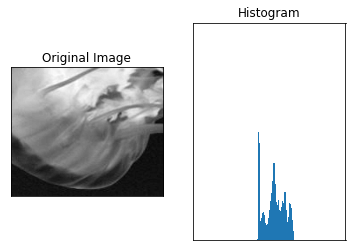

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

img = cv2.imread('/content/imagesegmentation/Meduse_degrade.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imwrite('/content/Meduse_degradeGreyScale.jpg', img)
#-----------------------------
# Print min and max pixel values of the image
print('Min and max values of the grey-scale image:')
print(np.min(img))
print(np.max(img))

#img[0,0]=0 # premier pixel noir
#img[0,1]=255 # second pixel blanc

#-----------------------------
# Histogram of the image
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(img.ravel(), 256,[0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

You have certainly noticed that the min and max values ​​of the pixels of the image are respectively 103 and 174 while the grey-scale image displayed using matplotlib seems to display values ​​from 0 to 255 (non-degraded image ...). To have a better comparison, we have saved the greyscale image in the files directory on the left of your screen. You can open the file Meduse_degradeGreyScale.jpg and compare it to the same data displayed by matplotlib. 

One more think you should be aware and careful of! Strange ? We will look at it closer below.

3- We are going to modify the Meduse_degrade.jpg image by changing the value of 2 of its pixels so that we have a white pixel (value of 255), another black one (value of 0) and all the others identical to the original image. 
In Python, modify one pixel of the image (for example pixel [0,0]) so that it is black and a second  (for example pixel [0,1]) so that it is white.  Display this modified image. Note that you can previously make a copy of the image via img2 = deepcopy(img) to keep the original image.




Min and max values of the grey-scale image:
103
174


(Text(0.5, 1.0, 'Histogram'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

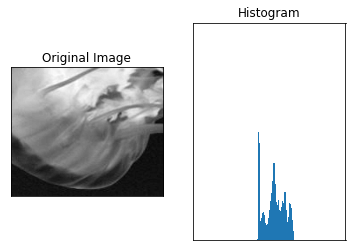

In [ ]:
#-----------------------------
# Real image histogram (not automatically modified by matplotlib when plotting)
img2 = deepcopy(img); #.copy();
 
# TODO : change the value of 2 pixels

#-----------------------------
# Print min and max pixel values of the image
print('Min and max values of the grey-scale image:')
print(np.min(img2))
print(np.max(img2))

plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(img2.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

# Matplotlib makes his own histogram, his own min-max

Compare with the image displayed before (in 2-).


<blockquote>

Yes, it seems that imshow display method of Matplotlib is doing a min-max equalization... Why ? 


Certainly because its role is to display, so that it does the best it can for the reader : more contrast leads to a better visalisation for the user.

</blockquote>




4- In Python, perform a histogram transformation of MinMax type and one of histogram equalization type. To create a histogram, you can use the histogram method of numpy.

Display the results images and their histograms. Save the equalized image (you can use cv2.imwrite) and open it with your favorite image editor. Verify the hypothesis about imshow method. 


True

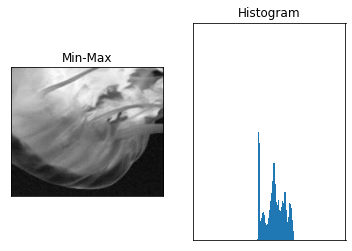

In [ ]:
#-----------------------------
# Min-Max
img_minmax = deepcopy(img);

# TODO

plt.subplot(121),plt.imshow(img_minmax, cmap = 'gray')
plt.title('Min-Max'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(img_minmax.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

cv2.imwrite('/content/Meduse_egaliseeMinMax.jpg', img_minmax)

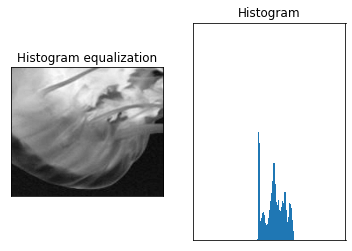

True

In [ ]:
#-----------------------------
# Histogram equalization

# TODO
img_egalisee = deepcopy(img);

plt.subplot(121),plt.imshow(img_egalisee, cmap = 'gray')
plt.title('Histogram equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.hist(img_egalisee.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('/content/Meduse_egaliseeEqualization.jpg', img_egalisee)

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2.3 Histogram equalization - Solution</span>

Min and max values of the grey-scale image:
103
174
Min and max values of the equalized image
0.009723917022574741
255.0


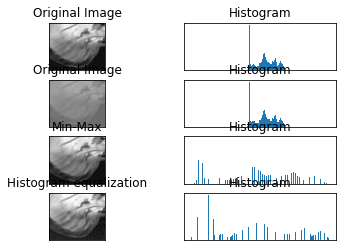

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

img = cv2.imread('/content/imagesegmentation/Meduse_degrade.jpg',cv2.IMREAD_GRAYSCALE)
#-----------------------------
# Print min and max pixel values of the image
print('Min and max values of the grey-scale image:')
print(np.min(img))
print(np.max(img))

#-----------------------------
# Image histogram
plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.hist(img.ravel(), 256,[0,256])
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Real image histogram (not automatically modified by matplotlib when plotting)
img2 = deepcopy(img); #.copy();
img2[0,0]=0 # premier pixel noir
img2[0,1]=255 # second pixel blanc
plt.subplot(423),plt.imshow(img2, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.hist(img2.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Min-Max
img_minmax = deepcopy(img);
val_min = np.min(img)
val_max = np.max(img)
coef = 1.0*255/(val_max-val_min);
img_minmax = (img_minmax-val_min)*coef;
img_minmax[0,0]=0
img_minmax[0,1]=255
plt.subplot(425),plt.imshow(img_minmax, cmap = 'gray')
plt.title('Min-Max'), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.hist(img_minmax.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

#-----------------------------
# Histogram equalization
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum() # compute cumulative histogram
cdf = (cdf)*255/(cdf.max()) # normalization betweeen 0 and 255
img_egalisee = cdf[img] # replace the values in the image

print('Min and max values of the equalized image')
print(np.min(img_egalisee))
print(np.max(img_egalisee))
img_egalisee[0,0]=0
img_egalisee[0,1]=255

plt.subplot(427),plt.imshow(img_egalisee, cmap = 'gray')
plt.title('Histogram equalization'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.hist(img_egalisee.ravel(),256,[0,256]);
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('/content/Meduse_egaliseeMinMax.jpg', img_minmax)
cv2.imwrite('/content/Meduse_egaliseeEqualization.jpg', img_egalisee)
cv2.destroyAllWindows()



